#### Random Imputation
here we fill missing values from the already given values in the same column and the value filled is random value

#### Advantages:-
distribution didn't change after imputation(reason is cause we are filling random values and the probability is also random for chosen value

#### Disadvantages:-
covariance changes

### whenever applying linear algorithm we can use this but in algo like Random forest, Decision Tree we cannot use

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic_toy.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [11]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,NaN,41.0
435,14.0,120.0000,14.0


In [12]:
X_test.isnull().sum()

Age            37
Fare            9
Age_imputed    37
dtype: int64

In [13]:
X_train.Age.dropna().sample()

51    21.0
Name: Age, dtype: float64

In [14]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train.Age.isnull().sum()).values

In [15]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test.Age.isnull().sum()).values

In [16]:
X_test.isnull().mean()

Age            0.206704
Fare           0.050279
Age_imputed    0.000000
dtype: float64

In [17]:
X_train.isnull().mean()

Age            0.196629
Fare           0.050562
Age_imputed    0.000000
dtype: float64

#### We have to see if the distribution changes

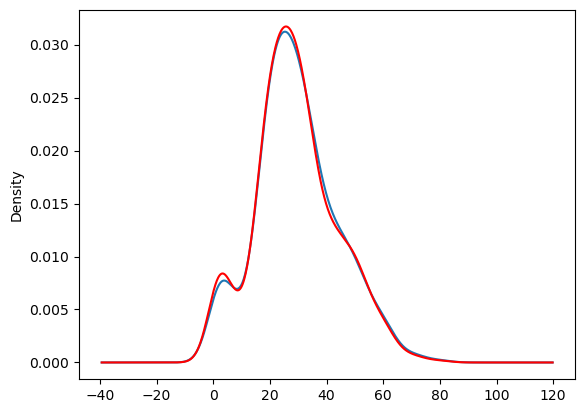

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train.Age.plot(kind='kde',ax=ax)

X_train.Age_imputed.plot(kind='kde',ax=ax,color='red');

In [19]:
import seaborn as sns

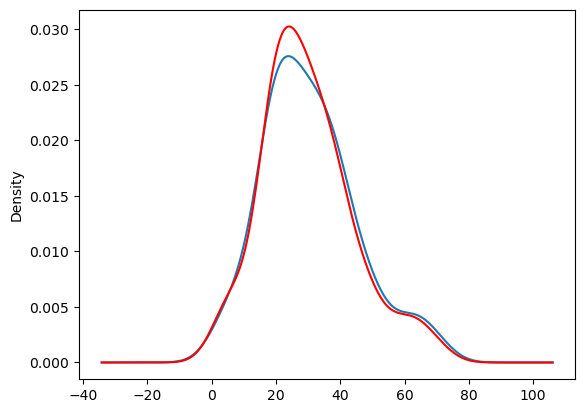

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_test.Age.plot(kind='kde',ax=ax)

X_test.Age_imputed.plot(kind='kde',ax=ax,color='red');

#### Also check the variance and correlation as well

In [21]:
print("original variance for age column",X_train.Age.var())
print("changed variance for age column",X_train.Age_imputed.var())

original variance for age column 210.2517072477438
changed variance for age column 209.77176906082573


In [22]:
X_train.corr()

,Age,Fare,Age_imputed
Age,1.000000,0.091482,1.000000
Fare,0.091482,1.000000,0.083804
Age_imputed,1.000000,0.083804,1.000000


#### now let's check if there are some outliers added after implementation

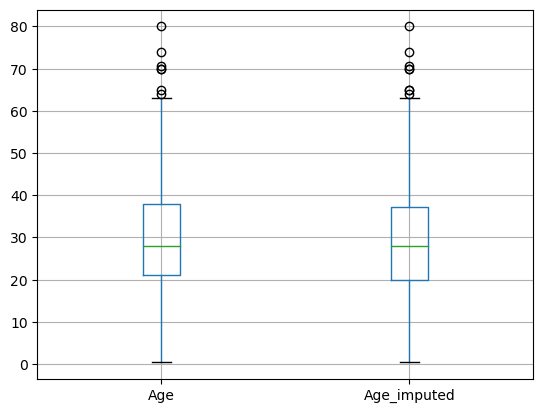

In [23]:
X_train[['Age','Age_imputed']].boxplot();

#### now doing it for a data which has categorical values in it

In [24]:
data = pd.read_csv('day37.csv',usecols=["GarageQual","FireplaceQu","SalePrice"])

In [25]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
# data['FireplaceQu_imputed'] = data['FireplaceQu']

# data['GarageQual_imputed'] = data['GarageQual']

In [28]:
X = data.drop('SalePrice',axis=1)
y = data.SalePrice

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [32]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [41]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values



X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FireplaceQu          621 non-null    object
 1   GarageQual           1104 non-null   object
 2   FireplaceQu_imputed  1168 non-null   object
 3   GarageQual_imputed   1168 non-null   object
dtypes: object(4)
memory usage: 45.6+ KB


#### Here I wanted to see if the distiribution changes wrt to each value in a column

In [45]:
X_train.head()

,FireplaceQu,GarageQual,FireplaceQu_imputed,GarageQual_imputed
254,NaN,TA,TA,TA
1066,TA,TA,TA,TA
638,NaN,NaN,Gd,TA
799,TA,TA,TA,TA
380,Gd,TA,Gd,TA


In [54]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts()/len(X_train)],
    axis=1)
temp.columns = ['original', 'new']
temp

,original,new
Gd,0.491143,0.494863
TA,0.405797,0.400685
Fa,0.043478,0.042808
Ex,0.033816,0.035103
Po,0.025765,0.026541


In [55]:
temp2 = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)],
    axis=1)
temp2.columns = ['original', 'new']
temp2

,original,new
TA,0.951087,0.951199
Fa,0.032609,0.032534
Gd,0.011775,0.011130
Ex,0.002717,0.003425
Po,0.001812,0.001712
